## Sales Forcasting Project


#### Objective:
Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset.

#### Dataset:
Superstore Sales Dataset from https://www.kaggle.com/rohitsahoo/sales-forecasting

### Loading Phase

In [2]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [60]:
# load in dataset

url = '~/Documents/GitHub/Sales_Prediction/train.csv'

data = pd.read_csv(url)

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Exploratory Data Analysis

In [61]:
# summarize dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [62]:
# remove Row ID

data.drop('Row ID',axis=1,inplace=True)

In [63]:
# convert dates to datetime

data['Order Date'] = pd.to_datetime(data['Order Date'], format = '%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format = '%d/%m/%Y')

print(data['Order Date'].dtypes, data['Ship Date'].dtypes)

datetime64[ns] datetime64[ns]


In [64]:
# drop NA in postal codes and convert to integer

data = data.dropna()

data['Postal Code'] = data['Postal Code'].astype('int64')

In [65]:
data['Postal Code'].dtype

dtype('int64')

In [66]:
# add in new features from dates

data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day
data['Order Week_day'] = data['Order Date'].dt.weekday

data['Ship Year'] = data['Ship Date'].dt.year
data['Ship Month'] = data['Ship Date'].dt.month
data['Ship Day'] = data['Ship Date'].dt.day
data['Ship Week_day'] = data['Ship Date'].dt.weekday

data['Ship Delay'] = pd.Series(delta.days for delta in (data['Ship Date'] - data['Order Date']))

In [67]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales,Order Year,Order Month,Order Day,Order Week_day,Ship Year,Ship Month,Ship Day,Ship Week_day,Ship Delay
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.9600,2017,11,8,2,2017,11,11,5,3.0
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.9400,2017,11,8,2,2017,11,11,5,3.0
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.6200,2017,6,12,0,2017,6,16,4,4.0
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,2016,10,11,1,2016,10,18,1,7.0
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,22.3680,2016,10,11,1,2016,10,18,1,7.0


In [ ]:
# exploration function
def explore(df):
    print("Shape: ", df.shape, "/n")
    print(df.dtypes, "/n")
    print(df.head(), "/n")
    # numeric data statistics
    print(df.describe())
    df.hist(figsize=(14,14), xrot=45)
    plt.show()
    # categorical data statistics
    print(df.describe(include = 'object'))
    for column in df.select_dtypes(include = 'object'):
        if df[column].nunique() < 10:
            sns.countplot(y = column, data = df)
            plt.show()
            plt.savefig('{}_dist.png'.format(column))

In [ ]:
explore(data)

In [68]:
# summarize dataset
data.describe(include='all')

<ipython-input-68-0024c6bb8125>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')
<ipython-input-68-0024c6bb8125>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales,Order Year,Order Month,Order Day,Order Week_day,Ship Year,Ship Month,Ship Day,Ship Week_day,Ship Delay
count,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789,...,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9778.000000
unique,4916,1229,1326,4,793,793,3,1,529,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA-2018-100111,2017-09-05 00:00:00,2018-09-26 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14,38,34,5849,35,35,5096,9789,891,1946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-03 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,230.116193,2016.723567,7.822658,15.486771,2.994790,2016.738788,7.756359,15.891817,3.138829,3.961955
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,625.302079,1.124184,3.277864,8.755461,2.180615,1.127048,3.334105,8.805848,1.962572,1.750578
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.444000,2015.000000,1.000000,1.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.248000,2016.000000,5.000000,8.000000,1.000000,2016.000000,5.000000,8.000000,2.000000,3.000000


In [69]:
# create a dictionay for counting each occurance of delay
delay = {}

for x in data['Ship Delay']:
    if x in delay:
        delay[x] += 1
    else:
        delay[x] = 1       
        
print('Ship Delay Counts:')

for key in sorted(delay): # sorts keys for delay dictionary
    if key <= data['Ship Delay'].max(): # eliminates printing nan values 
        print(key, ': ', delay[key])

Ship Delay Counts:
0.0 :  514
1.0 :  362
2.0 :  1291
3.0 :  975
4.0 :  2708
5.0 :  2144
6.0 :  1169
7.0 :  615


In [95]:
# apply counter column to data and groupby
data['COUNTER'] = 1
group_data = data.groupby(['Ship Delay', 'Ship Mode'])['COUNTER'].sum().reset_index()

print(group_data)

    Ship Delay       Ship Mode  COUNTER
0          0.0     First Class       41
1          0.0        Same Day      265
2          0.0    Second Class       50
3          0.0  Standard Class      158
4          1.0     First Class      193
5          1.0        Same Day       19
6          1.0    Second Class       24
7          1.0  Standard Class      126
8          2.0     First Class      367
9          2.0        Same Day       45
10         2.0    Second Class      482
11         2.0  Standard Class      397
12         3.0     First Class      358
13         3.0        Same Day       25
14         3.0    Second Class      282
15         3.0  Standard Class      310
16         4.0     First Class      240
17         4.0        Same Day       72
18         4.0    Second Class      453
19         4.0  Standard Class     1943
20         5.0     First Class      191
21         5.0        Same Day       53
22         5.0    Second Class      420
23         5.0  Standard Class     1480


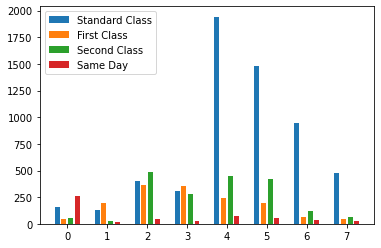

In [131]:
# create bar chart of shipping delay counts grouped by shipping method
fig, ax = plt.subplots()

ax.bar(x = group_data[group_data['Ship Mode'] == 'Standard Class']['Ship Delay'] - 1/4, height = group_data[group_data['Ship Mode'] == 'Standard Class']['COUNTER'], width = 1/8, label = 'Standard Class')
ax.bar(x = group_data[group_data['Ship Mode'] == 'First Class']['Ship Delay'] - 1/12, height = group_data[group_data['Ship Mode'] == 'First Class']['COUNTER'], width = 1/8, label = 'First Class')
ax.bar(x = group_data[group_data['Ship Mode'] == 'Second Class']['Ship Delay'] + 1/12, height = group_data[group_data['Ship Mode'] == 'Second Class']['COUNTER'], width = 1/8, label = 'Second Class')
ax.bar(x = group_data[group_data['Ship Mode'] == 'Same Day']['Ship Delay'] + 1/4, height = group_data[group_data['Ship Mode'] == 'Same Day']['COUNTER'], width = 1/8, label = 'Same Day')

plt.legend()
plt.show()

In [137]:
# remove customer ID and name from data
data = data.drop(columns = ['Customer ID', 'Customer Name'])

KeyError: "['Customer ID'] not found in axis"

In [140]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Order Year',
       'Order Month', 'Order Day', 'Order Week_day', 'Ship Year', 'Ship Month',
       'Ship Day', 'Ship Week_day', 'Ship Delay', 'COUNTER'],
      dtype='object')

In [141]:
data['Country'].unique()

array(['United States'], dtype=object)

Since everything is listed within the United States, we can reduce features to zipcode only to identify locations

In [142]:
data = data.drop(columns = ['Country', 'City', 'State', 'COUNTER'])

data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month', 'Order Day',
       'Order Week_day', 'Ship Year', 'Ship Month', 'Ship Day',
       'Ship Week_day', 'Ship Delay'],
      dtype='object')

In [156]:
# one-hot encoding categorical variables and remove one category from each group
ship_mode_dummies = pd.get_dummies(data['Ship Mode']).drop(columns = ['First Class'])
region_dummies = pd.get_dummies(data['Region']).drop(columns = ['Central'])
category_dummies = pd.get_dummies(data['Category']).drop(columns = ['Furniture'])
sub_category_dummies = pd.get_dummies(data['Sub-Category']).drop(columns = ['Tables'])

# join dummy dataframes together
data_dummies = ship_mode_dummies.join([region_dummies, category_dummies, sub_category_dummies])

data_dummies.head()

,Same Day,Second Class,Standard Class,East,South,West,Office Supplies,Technology,Accessories,Appliances,...,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# create data set of non-categorical variables

need to scale each column 

In [ ]:
# scale dataset by individual column between 0 & 1
